In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from bubble_plot.utils import describe_categorical_values
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, average_precision_score,f1_score
from sklearn.metrics import average_precision_score, accuracy_score, roc_auc_score
from sklearn.metrics import precision_recall_curve,recall_score
from sklearn.metrics import roc_curve, auc
import warnings
warnings.simplefilter(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Exercise 1:
Consider a cell-phone company that has thousands of customers and is interested in predicting the likelihood that specific customers will be churning in the next 3 months.

In [2]:
churn_history_matrix = pd.read_csv('./Data for metrics exercise/features_churn_matrix_ex1.csv')
churn_history_matrix.head()

,is_male,num_interactions_with_cust_service,country,late_on_payment,age,years_in_contract,churned
0,True,0.0,GRE,False,41.0,3.240370,False
1,True,1.0,ISR,False,29.0,2.121320,False
2,False,0.0,GRE,False,34.0,3.240370,False
3,False,1.0,ISR,False,29.0,3.240370,False
4,True,0.0,ISR,False,33.0,3.082207,False


Let's see some statistics

In [3]:
churn_history_matrix.shape

(50000, 7)

In [4]:
churn_history_matrix.iloc[:,0][-5:]

49995    False
49996     True
49997    False
49998     True
49999     True
Name: is_male, dtype: bool

In [5]:
churn_history_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   is_male                             50000 non-null  bool   
 1   num_interactions_with_cust_service  50000 non-null  float64
 2   country                             50000 non-null  object 
 3   late_on_payment                     50000 non-null  bool   
 4   age                                 50000 non-null  float64
 5   years_in_contract                   50000 non-null  float64
 6   churned                             50000 non-null  bool   
dtypes: bool(3), float64(3), object(1)
memory usage: 1.7+ MB


We can see there are non NAN's in our data, which is great

In [6]:
churn_history_matrix.isna().sum()

is_male                               0
num_interactions_with_cust_service    0
country                               0
late_on_payment                       0
age                                   0
years_in_contract                     0
churned                               0
dtype: int64

It's good to look separately on numerical and categorical data

In [7]:
numerical_columns = churn_history_matrix.describe().columns

categorical_columns = churn_history_matrix.dtypes[churn_history_matrix.dtypes != float].index.tolist()

print('continious features: {}'.format(numerical_columns))
print('\ncategorical features: {}'.format(categorical_columns))

continious features: Index(['num_interactions_with_cust_service', 'age', 'years_in_contract'], dtype='object')

categorical features: ['is_male', 'country', 'late_on_payment', 'churned']


In [8]:
churn_history_matrix['country'].value_counts()

GRE    25075
ISR    24925
Name: country, dtype: int64

Lets make binary values of `boolean` features  as type `int`, also feature `country` we will replase with  `1` and `0`

In [9]:
churn_history_matrix[['is_male', 'late_on_payment', 'churned']] = \
churn_history_matrix[['is_male', 'late_on_payment', 'churned']].astype(int)

In [10]:
churn_history_matrix['country'] = churn_history_matrix['country'].replace({'ISR':1, 'GRE':0})

Now let's look at the numerical/categorical data again

In [11]:
numerical_columns = churn_history_matrix.describe().columns

categorical_columns = churn_history_matrix.dtypes[churn_history_matrix.dtypes == object].index.tolist()

print('continious features: {}'.format(numerical_columns))
print('\ncategorical features: {}'.format(categorical_columns))

continious features: Index(['is_male', 'num_interactions_with_cust_service', 'country',
       'late_on_payment', 'age', 'years_in_contract', 'churned'],
      dtype='object')

categorical features: []


In [12]:
churn_history_matrix.describe()

,is_male,num_interactions_with_cust_service,country,late_on_payment,age,years_in_contract,churned
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.500300,0.723620,0.498500,0.098820,30.003780,2.606454,0.160920
std,0.500005,1.018634,0.500003,0.298423,5.011733,1.092485,0.367461
min,0.000000,0.000000,0.000000,0.000000,9.000000,0.707107,0.000000
25%,0.000000,0.000000,0.000000,0.000000,27.000000,1.870829,0.000000
50%,1.000000,1.000000,0.000000,0.000000,30.000000,2.549510,0.000000
75%,1.000000,1.000000,1.000000,0.000000,33.000000,3.391165,0.000000
max,1.000000,16.000000,1.000000,1.000000,49.000000,6.745369,1.000000


Well, now we have only numerical features

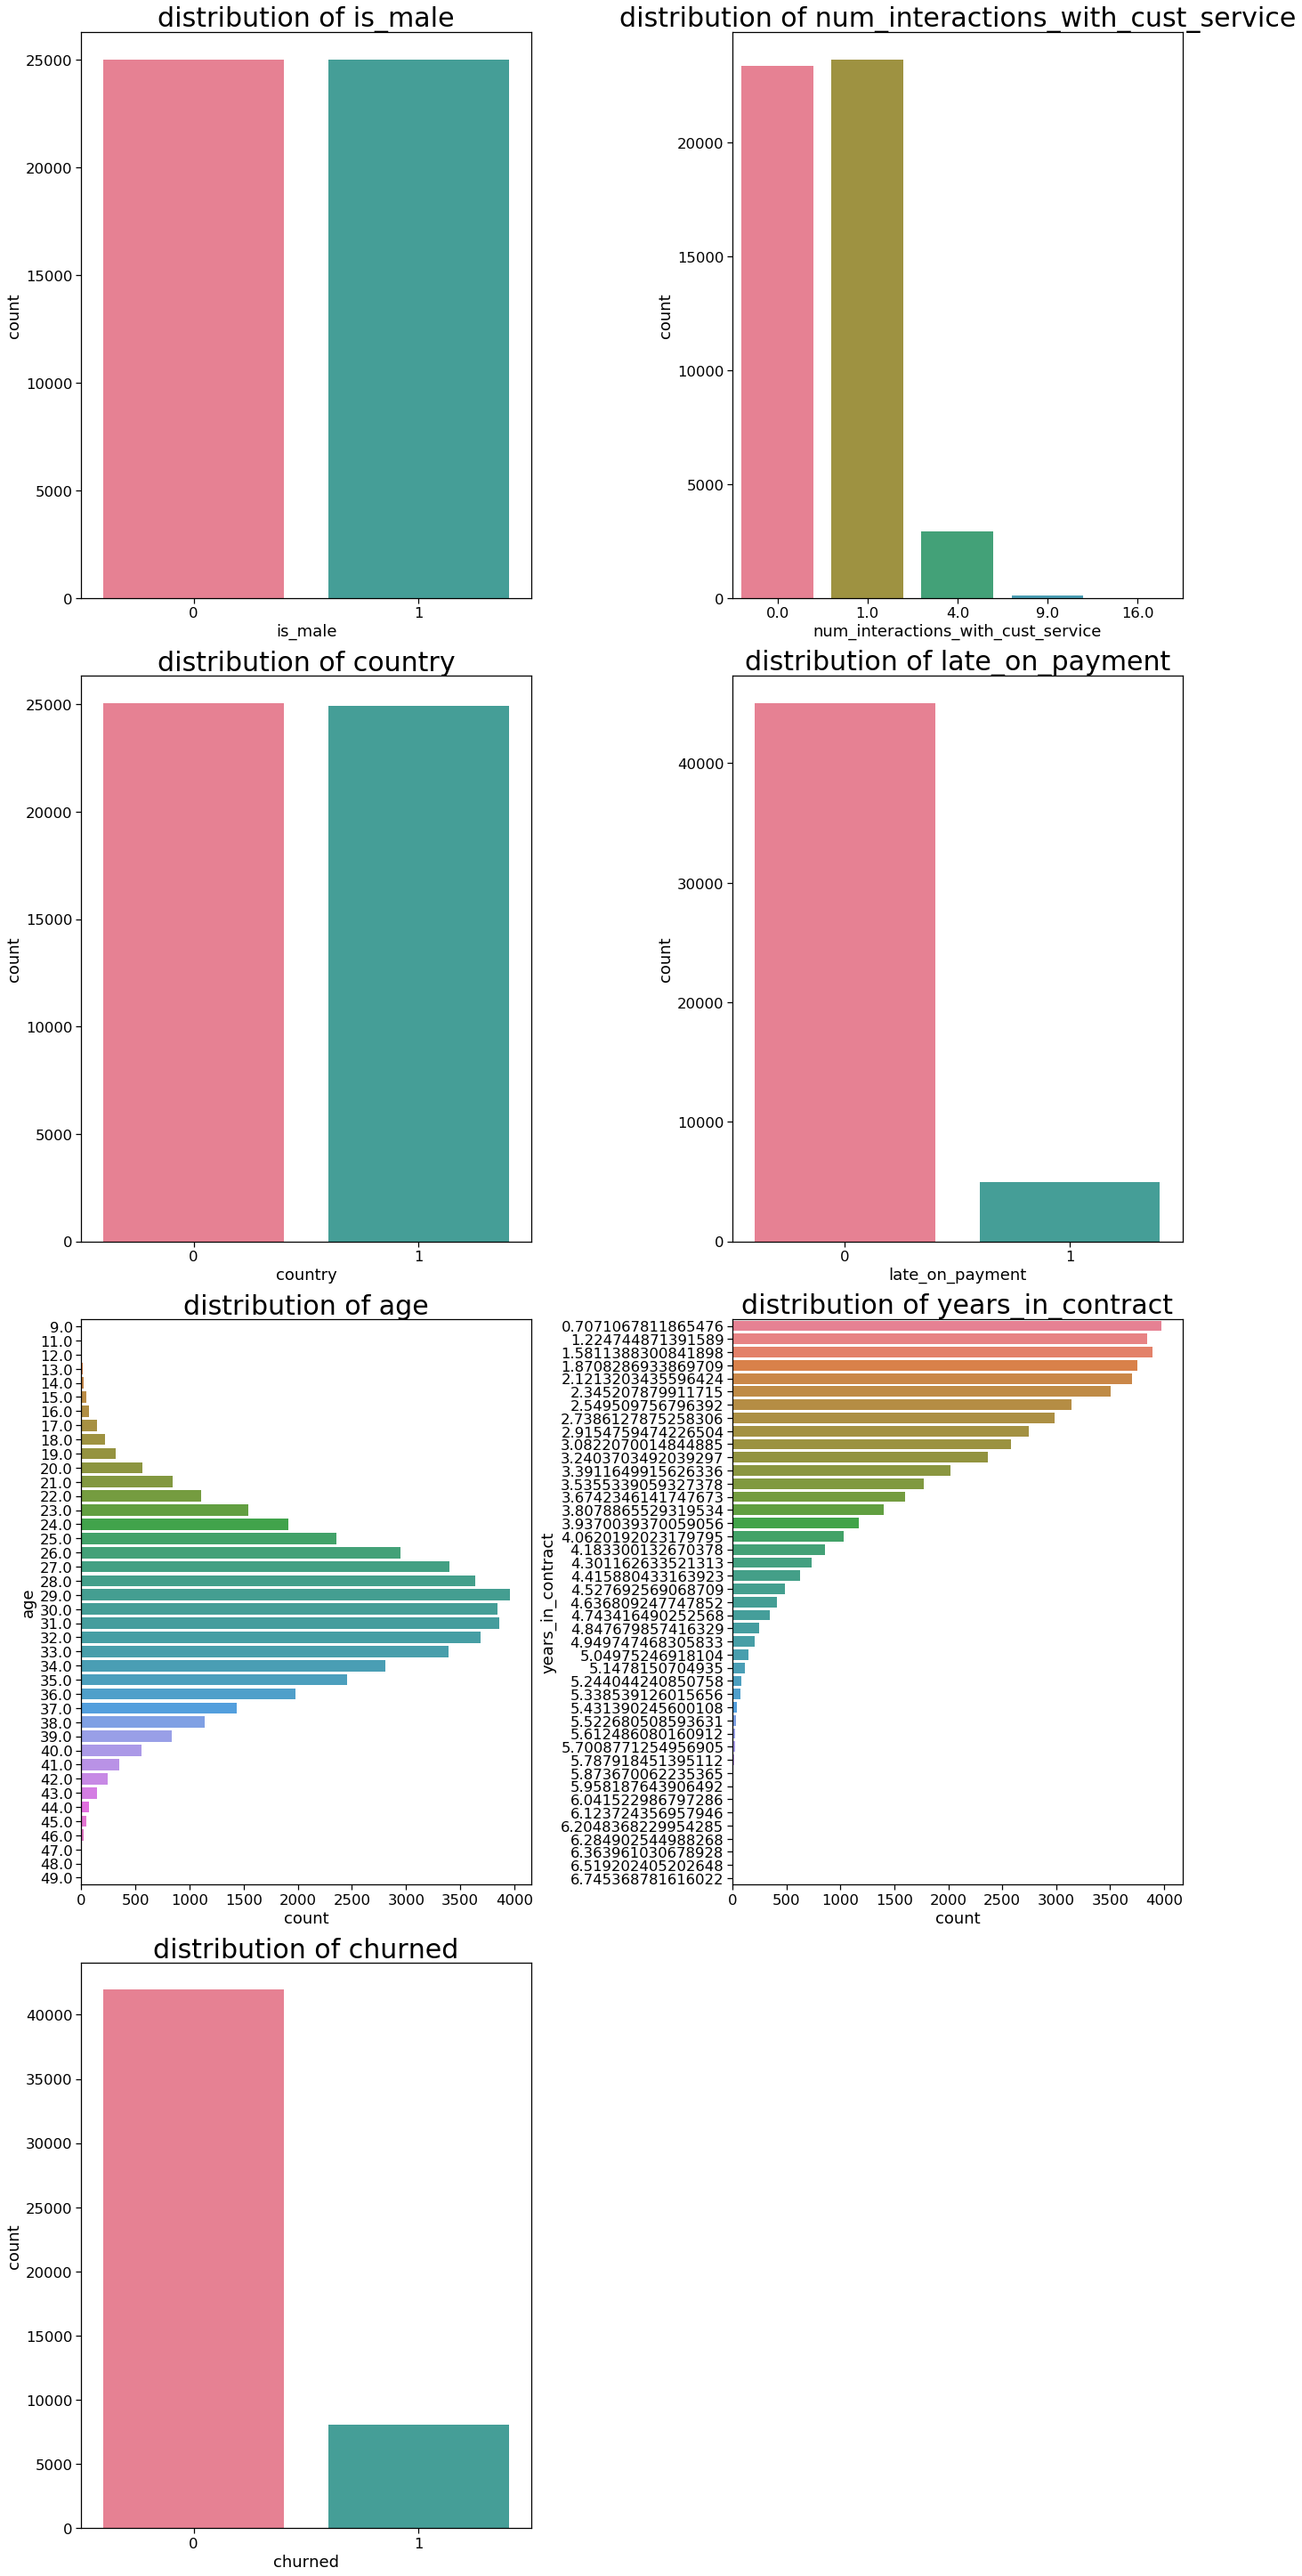

In [13]:
plt.figure(figsize=(20,40))
for i,col in enumerate(numerical_columns):
    plt.subplot(4,2,i+1)
    plt.tight_layout()
    plt.title(f'distribution of {col}', fontsize=30)
    if col in('age','years_in_contract'):
        sns.countplot(y=col, palette="husl", data=churn_history_matrix)
    else:
        sns.countplot(x=col, palette="husl", data=churn_history_matrix)

In [14]:
churn_history_matrix['num_interactions_with_cust_service'].value_counts()/len(churn_history_matrix)*100

1.0     47.270
0.0     46.688
4.0      5.860
9.0      0.180
16.0     0.002
Name: num_interactions_with_cust_service, dtype: float64

Well, i guess we should union in `num_interactions_with_cust_service` values categories 4, 9 and 16 into category `2` only because they all together will be about 6% of all column values and this new category will have the meaning `2 and more times`

In [15]:
churn_history_matrix['num_interactions_with_cust_service'] =\
    churn_history_matrix['num_interactions_with_cust_service'].replace({4.0:2.0, 9.0:2.0,16.0:2.0 })

In [16]:
churn_history_matrix['num_interactions_with_cust_service'].value_counts()/len(churn_history_matrix)*100

1.0    47.270
0.0    46.688
2.0     6.042
Name: num_interactions_with_cust_service, dtype: float64

Let's check for outliers `'age` and `years_in_contract`

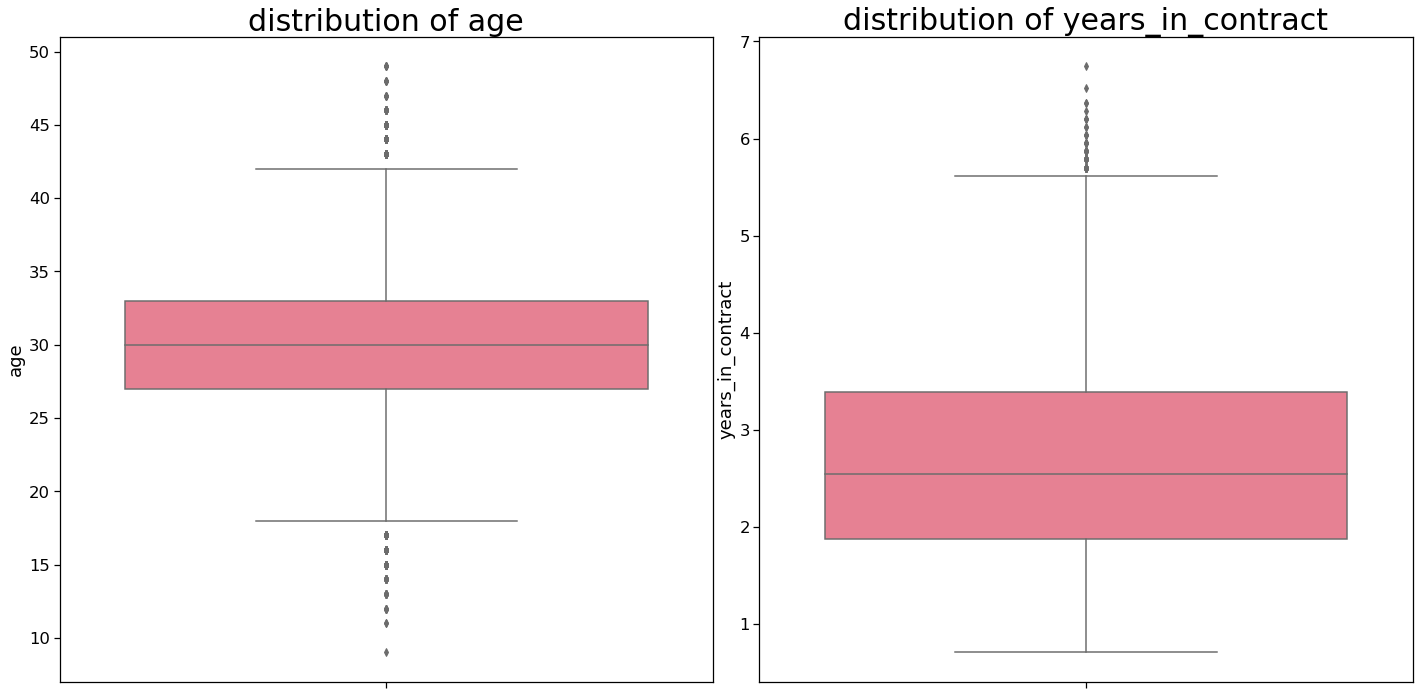

In [17]:
plt.figure(figsize=(20,10))
for i,col in enumerate(['age','years_in_contract']):
    plt.subplot(1,2, i+1)
    plt.tight_layout()
    plt.title(f'distribution of {col}', fontsize=30)
    sns.boxplot(y=col, palette="husl", data=churn_history_matrix)

But let's take a look how balanced the data is

In [18]:
churn_history_matrix.churned.value_counts()/len(churn_history_matrix)

0    0.83908
1    0.16092
Name: churned, dtype: float64

Not very good - the data is imbalanced. Let's do downsampling

In [19]:
churn_history_matrix = churn_history_matrix.drop(churn_history_matrix[churn_history_matrix['churned'] == 0].sample(frac=.8).index).copy()

Check what we have done:

In [20]:
churn_history_matrix.churned.value_counts()/len(churn_history_matrix)

0    0.510495
1    0.489505
Name: churned, dtype: float64

Good, let's go to the next step and check the correlation between the features

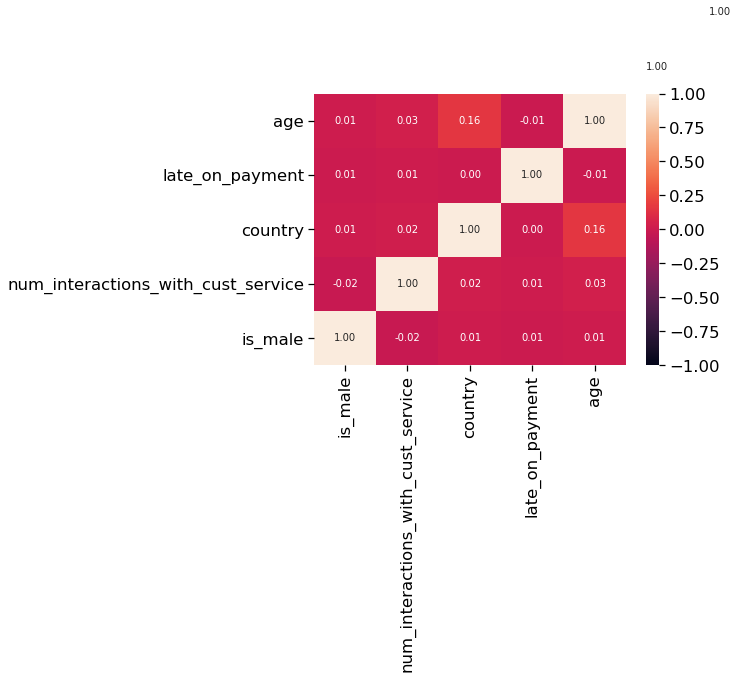

In [21]:
plt.figure(figsize=(7, 5))
sns.heatmap(churn_history_matrix.corr(), annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.xlim(0,5)
plt.ylim(0,5);

And nothing weird for now with our data, we can continue some preproceccing and leave outliers in these two features

In [22]:
features = ['is_male', 'num_interactions_with_cust_service', 'country',
       'late_on_payment', 'age', 'years_in_contract']

**Our business question:** Predicting whether a person will churned or not. Therefore our dependent variable is the `churned` which is now a binary numerical feature

In [23]:
target = 'churned'

## 1A

Train a model to predict the likelihood of churning.

**Make sure to create a train/test split (with 20% test data).**

In [24]:
X = churn_history_matrix[features]
y = churn_history_matrix[target]


Let's stratify by  our target variable

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=4)

What about shape?

In [26]:
X_train.shape[0], X_test.shape[0],y_train.shape[0], y_test.shape[0]

(13149, 3288, 13149, 3288)

Let's check the proportion of spliting

In [27]:
print(f'Splited  dataset into a 2 sets : \
      \nTrain set is:{round(len(X_train)/len(churn_history_matrix)*100,2)}% \
      \nTest set is:{round(len(X_test)/len(churn_history_matrix)*100, 2)}%')

Splited  dataset into a 2 sets :       
Train set is:80.0%       
Test set is:20.0%


In [28]:
churn_history_matrix.churned.value_counts()/len(churn_history_matrix)


0    0.510495
1    0.489505
Name: churned, dtype: float64

In [29]:
pd.Series(y_train).value_counts()/len(y_train)


0    0.510457
1    0.489543
Name: churned, dtype: float64

In [30]:
pd.Series(y_test).value_counts()/len(y_test)


0    0.510645
1    0.489355
Name: churned, dtype: float64

The splitting went good and correct
<br>It's time to fit our model LogisticRegression

In [31]:
rf = make_pipeline(StandardScaler(),LogisticRegression())
rf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [32]:
y_pred = rf.predict(X_test)


## 1B
Print the confusion matrix

In [33]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1189,  490],
       [ 479, 1130]])

In [34]:
def draw_confusionmatrix(ytest, yhat):
    plt.figure(figsize=(7,5))
    cm = confusion_matrix(ytest, yhat)
    ax = sns.heatmap(cm, annot=True, annot_kws={"size": 13},fmt="d", cmap=plt.cm.cividis)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix of classifier')

    acc = accuracy_score(ytest, yhat)
    print(f"Sum Axis-1 as Total Accuracy: {acc}")

Sum Axis-1 as Total Accuracy: 0.7052919708029197


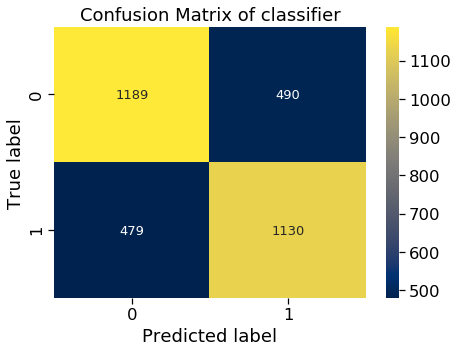

In [35]:
draw_confusionmatrix(y_test, y_pred)


## 1C
What are the accuracy, ROC-AUC, and average precision of your model?

In [36]:
print (f"Accuracy Score : {accuracy_score(y_test, y_pred)}, \
\n\nROC-AUC : {round(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]),4)}, \
\n\nAverage Precision:{round(average_precision_score(y_test, rf.predict_proba(X_test)[:,1]),4)}")


Accuracy Score : 0.7052919708029197, 

ROC-AUC : 0.7784, 

Average Precision:0.7645


In [37]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1679
           1       0.70      0.70      0.70      1609

    accuracy                           0.71      3288
   macro avg       0.71      0.71      0.71      3288
weighted avg       0.71      0.71      0.71      3288



## 1D
Display the AUC-ROC Curve and the PR Curve

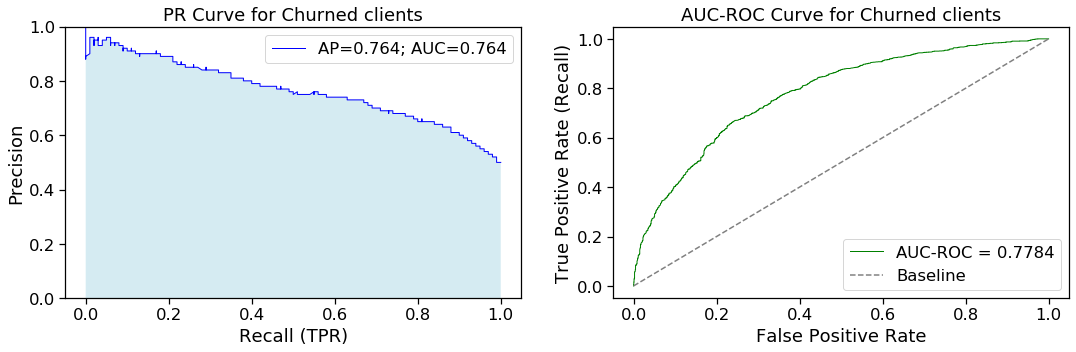

In [38]:
fig = plt.figure(figsize = (18,5))
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1], pos_label=1)
precision, recall = np.round(precision, 2), np.round(recall, 2)
# average precision score
avg_precision = average_precision_score(y_test, rf.predict_proba(X_test)[:,1],pos_label=1)
# precision auc
pr_auc = auc(recall, precision)

ax1 = plt.subplot(121)
ax1.plot(recall, precision, lw=1, color='blue', label=f'AP={round(avg_precision,3)}; AUC={round(pr_auc,3)}') 
plt.fill_between(recall, precision,-1, facecolor='lightblue', alpha=0.5)
plt.xlabel('Recall (TPR)')
plt.ylim(0,1)

plt.ylabel('Precision')
plt.legend(loc="best")
plt.title('PR Curve for Churned clients');

# calculate AUC-ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

ax2 = plt.subplot(122)
ax2.plot(fpr, tpr, lw=1, color='green',label=f"AUC-ROC = {round(roc_auc,4)}") 
ax2.plot(ns_fpr, ns_tpr, color='grey',linestyle='--', label='Baseline')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc="best")
plt.title('AUC-ROC Curve for Churned clients');

## 1E
What is the precision at the 0.1 recall level?

In [39]:
indx = np.flatnonzero(recall == 0.1)
precision[indx]
print(f"The Precision at the 0.1; Recall level: {np.max(precision[indx])}")

The Precision at the 0.1; Recall level: 0.92


## 1F
**How would you describe the accuracy of your model to your boss in 1 minute?
<br>Please write down a sentence or two explaining why you picked that metric.**

Well, boss, what to say?....The accuracy score tells us that in 71.00% cases we will have a correct prediction. This is not very good only because we will be mistaking with other 29.00% of predictions, i.e. we will have 29.00% False detected as churned. 
<br>But
<br>From the ROC-AUC plot/score we see that there's 77,68% probability that we'll rank a churning user higher than a non churning user.

## 1G
**The Director of Marketing wants this model because they want to give a discount voucher to customers that are at risk of leaving. Previous research has concluced that giving these vouchers to the 5% of customers that are at most risk of churn is optimal.**
<br>**How would you present your metric with this new information?**

**How would you explain to the Director of Marketing that your model can help in this campaign?**

Well, we have a probability of correct answer for churned clients on the level 71%, also we have f1 score with the same confirming 71% of estimates converting into reality,
<br>We will use this metrics to sort the most risk to churn cliens and will take 5% from there





At first we will make back all string information which we removed with numbers

In [40]:
X_present = X_test.copy()
X_present[['is_male', 'late_on_payment']] = \
X_present[['is_male', 'late_on_payment']].astype(bool)
X_present['country'] = churn_history_matrix['country'].replace({1:'ISR', 0:'GRE'})

In [41]:
X_present['churned']=y_test

In [42]:
X_present['churn_prob'] = rf.predict_proba(X_test)[:,1]
X_present.sort_values('churn_prob', ascending = False, inplace = True)
X_present[:int(len(X_test)/100*5)]

,is_male,num_interactions_with_cust_service,country,late_on_payment,age,years_in_contract,churned,churn_prob
31800,True,2.0,GRE,False,19.0,1.870829,1,0.971836
31085,True,1.0,GRE,True,14.0,1.581139,1,0.971222
35804,True,2.0,GRE,False,21.0,0.707107,1,0.970783
42324,True,2.0,GRE,False,19.0,2.915476,1,0.965627
48454,True,2.0,GRE,True,25.0,0.707107,1,0.963145
...,...,...,...,...,...,...,...,...
3796,True,2.0,GRE,False,31.0,1.870829,1,0.874332
25250,True,2.0,GRE,False,29.0,3.240370,1,0.874033
41531,True,1.0,GRE,False,22.0,2.738613,1,0.873238
3711,True,1.0,GRE,False,25.0,0.707107,1,0.873193



The table upper exactly shows those 500 clients

**Please write down one sentence describing why you picked this metric.**

The returned estimates for all classes are ordered by the label of classes. So we just choose our churned == 1 and got probabilities for class label 1, but we have not a very good model for predicting without mistakes 

In [43]:
rf.predict_proba(X_test)[:,1]

array([0.37857878, 0.33521221, 0.48745062, ..., 0.3673947 , 0.28989883,
       0.23289811])

## 1H
**The CFO just heard that you have this awesome new model trained and ready to roll!  Sadly, she couldn't care less about those coupons.**

**Instead, she would like to accurately predict the probabily that each customer will be churning so that the Finance team can accurately calculate revenue projections across many cohorts of users.**

**How would you present your metric with this new information? How would you explain to the CFO that your model can help in this campaign? Please write down one sentence describing why you picked this metric.**

 The TPR (recall) can help also a lot to show the situation. It's low. We may want to decrease the threshold to optimize it.
 <br>The accuracy of the model  is more suitable to predict those clients who will not churn. But we have an idea even in such case:

From PR curve, we observe a high degree of precision can be maintained while maximizing recall (upper-right corner). We can  increase fraction of real  churned cliens changing the threshhold.

In [44]:
recall = recall_score(y_test,y_pred)

recall, accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='macro')

(0.7022995649471722, 0.7052919708029197, 0.7051970476327329)

We will add the probabilities of non churned clients and this table will help the marketing departament a lot

In [45]:
X_present['not_churn_prob'] = rf.predict_proba(X_test)[:,0]
X_present.sort_values('not_churn_prob', ascending = False, inplace = True)
X_present.head()

,is_male,num_interactions_with_cust_service,country,late_on_payment,age,years_in_contract,churned,churn_prob,not_churn_prob
32103,False,1.0,ISR,False,20.0,0.707107,0,0.679799,0.977023
3816,False,0.0,ISR,False,39.0,3.391165,0,0.033860,0.976563
21711,False,1.0,GRE,False,25.0,1.224745,1,0.751600,0.968304
21858,False,1.0,GRE,True,19.0,4.183300,1,0.834662,0.966140
4326,True,0.0,ISR,False,28.0,4.062019,1,0.215038,0.965064


Also, if they will see that the scores are +/- the same level, they can sort such clients and make a survey or  some promotion for that group of clients